# Open this notebook in colab
#<a href="https://colab.research.google.com/github/da-roth/NeuronalNetworkTensorflowFramework/blob/main/src/Examples_Colab/Experimentel/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
pip install git+https://github.com/da-roth/NeuronalNetworkTensorflowFramework#montecarlolearning


size 544
Used batch_size will be: 150


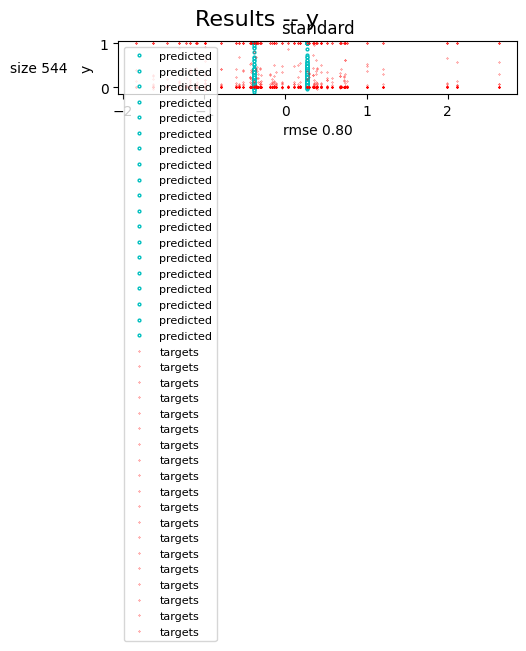

In [15]:
### Copy of Main.py as a juypter notebook to visualize results

###
### 0. Import packages and references
###
### - dataSeed = seed for simulations or (for csv input) for randomization of csv

from montecarlolearning import *
#print(dir(montecarlolearning))

dataSeed = 3
weightSeed = 1 

###
### 1. Training data
###

x = ['active','mean_dist_stanlag','dist_capital_stanlag','ch_dist_capital_stanlag','territorial','government','osk_a_stanlag','osk_b_stanlag','closed_aut','elect_aut','elect_dem','lib_dem','ln_brd_lag','low_intlev','high_intlev','internationalised','infmorMA_nn','frac_std','y_active_std']
y = ['ordinal_theta']

sizes = [544] # training set sizes. Performed one after the other and might be compared
nTest = 0.9 # Test set is given through a ratio of 0.8 in generator

generator = DataImporter('second_NN_new.csv',x,y,nTest) 
outputDimension = 1

###
### 2. Set Nueral network structure / Hyperparameters
### 


hiddenNeurons = 50               # we use equal neurons for each hidden layer
hiddenLayers = 10             # amount of hidden layers
activationFunctionsHidden = tf.nn.tanh   # activation functions of hidden layers
activationFunctionOutput = tf.nn.relu

epochs=100
learning_rate_schedule=[(0.0, 0.05), 
                        (0.1, 0.025), 
                        (0.2, 0.025),
                        (0.25, 0.0225),
                        (0.3, 0.02),
                        (0.4, 0.02),
                        (0.45, 0.02),
                        (0.5, 0.00001)] 
batches_per_epoch=10
min_batch_size=150

biasNeuron = True

###
### 3. Train network
###
trainingMethod = TrainingMethod.Standard
xTest, yTest, yPredicted = train_and_test(generator, sizes, nTest, dataSeed, None, weightSeed, hiddenNeurons, hiddenLayers, activationFunctionsHidden, trainingMethod = trainingMethod, epochs = epochs,learning_rate_schedule=learning_rate_schedule,batches_per_epoch=batches_per_epoch,outputDimension=outputDimension,biasNeuron=biasNeuron,min_batch_size=min_batch_size,activationFunctionOutput=activationFunctionOutput)
    
### 4. Study results
###   
plot_results("Results", yPredicted, xTest, "x", "y", yTest, sizes, True, False, None, trainingMethod)